# Paid Search Prediction Model & Visualization

Step 1. Model Training
 - train classification model to classify paid search driven reservations
 - model script file: Model.trained.ipynb
 - hold-out test set processing script file: Hold_out_test_set_data_preparation.ipynb
 - for more details, refer to below at section "Model Training"
 
Step 2. Paid to Organic Ratio Calculation & Visualization
 - calculated paid to organic ratio of reservations using processed data
 - Created word cloud visualization of 'survey_user_text' and 'cancellation_reason'
 
Step 3. SpotHero Market Dashboard
 - created a interactive dashboard in Tableau to visualize SpotHero's volume number and customer preference across different markets
  

## Step 1. Model Training

In this section, we built a classification model to classify paid search driven reservations from other-channels-driven reservations, using features extract from reservation metadata and user survey. The model is in script 'model.trained.ipynb'. Note:

********************************************************************************
## To Score The Model With Hold-out Test Set from SpotHero  
                                                           
********************************************************************************

Before starting 'model.trained.ipynb' script to run the hold-out test set and score the model, please read in and process the data in 'Hold_out_test_set_data_preparation.ipynb' script. The data will be fully processed and selected features will be written out to local csv file named "cols_to_model_holdout.csv" with corresponding index/key 'user_id' to local csv file "user_id_holdout.csv". Both files will be read in to 'model.trained.ipynb' file to return the prediction results. 

 For model training, the input dataset provided is "spothero_ds_takehome.csv"  (215235 rows, 23 columns) with one numeric variable and 22 categorical/index variables. After feature engineering, we imputed missing values, recoded existing variables to reduce dimension, created new variables from existing variables. We also onehot-encoded all the categorical variables. In the feature selection step, we selected 52 variables as features to enter the classification model. Features selected are:

       ['Windows', 'iOS', 'Mac', 'Chrome', 'Linux', 'Ubuntu', 'Other_system',
       'is_first_purchase_t', 'rental_source_mobile-web', 'rental_source_web',
       'reservation_status_valid',
       'discount_promocode_campaign_channel_Business Partnerships',
       'discount_promocode_campaign_channel_Deal Sites',
       'discount_promocode_campaign_channel_Email',
       'discount_promocode_campaign_channel_Employee Promo Codes',
       'discount_promocode_campaign_channel_Hero Customer Service Codes',
       'discount_promocode_campaign_channel_Paid Search',
       'discount_promocode_campaign_channel_Partnerships',
       'discount_promocode_campaign_channel_Radio ',
       'discount_promocode_campaign_channel_Site ',
       'discount_promocode_campaign_channel_Social Media',
       'discount_promocode_campaign_channel_off campaign',
       'user_signup_source_android', 'user_signup_source_ios',
       'user_signup_source_web',
       'survey_response_Ad on a Website or Mobile App',
       'survey_response_App Store (e.g. iTunes or Google Play)',
       'survey_response_Craigslist',
       'survey_response_Direct Mail Coupon/Flyer',
       'survey_response_Employer or Co-worker', 'survey_response_Event',
       'survey_response_Outdoor Ad (e.g. billboard, bus, train)',
       'survey_response_Radio Ad', 'survey_response_Received a promo code',
       'survey_response_Search Engine', 'survey_response_TV',
       'market2_Baltimore', 'market2_Boston', 'market2_Chicago',
       'market2_Denver', 'market2_Los Angeles', 'market2_Milwaukee',
       'market2_New York', 'market2_Newark', 'market2_Philadelphia',
       'market2_San Francisco', 'market2_Washington', 'user_email_aol.com',
       'user_email_comcast.net', 'user_email_gmail.com',
       'user_email_hotmail.com', 'user_email_yahoo.com']
       
In model building phase, we implemented the classifier in two methods - Logistic Regression and Gradient Boosting Method. Here we primarily use logistic regression for analysis. Both models are implemented in the model.trained.ipynb script file, and model prediction outputs will be written out to local csv files named "spothero_holdout_prediction.csv" for logistic regression model, and "spothero_holdout_prediction2.csv" for gradient boosting model. 

The top 15 feature coefficients returned from trained logistic regression model are:

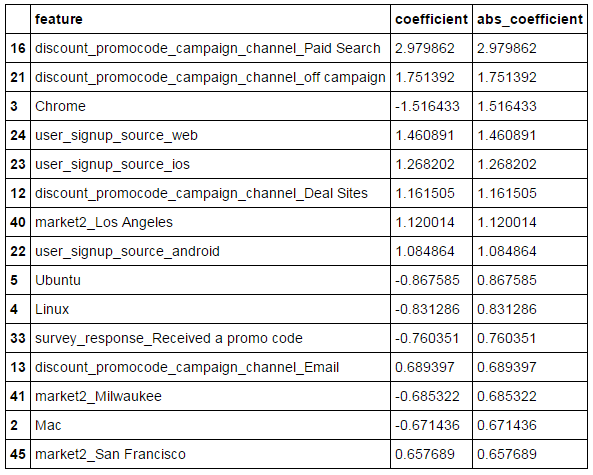

In [1]:
from IPython.display import Image
Image(filename = 'spothero_logfit_coefs.png', width=450, height=350)

From the feature coefficients table above, we can see that among the top 15 predictive features for whether the reservation is initiated by paid research, four of them are 'discount_promocode_campaign_channel' features. They are 'discount_promocode_campaign_channel_Paid Search', 'discount_promocode_campaign_channel_off campaign', and 'discount_promocode_campaign_channel_Deal Sites', and 'discount_promocode_campaign_channel_Email'. While the second best predictor is 'discount_promocode_campaign_channel_off_campaign' does not provide too much information about the customers behind the scene who were brought in by paid search, because large amount of missing values (201560) in the 'discount_promocode_campaign_channel' variable is imputed as 'off campaign', the other three are all directly or indirectly correlated to digital advertising such as promo code in paid search ads, promo code in deal sites, and promo code in emails. This shows that paid search are effective in driving sales within people who are pro-digital and avid deal seekers.  

The fact that three features created from 'user_signup_source' for {web, ios, android} are relatively predictive in the model against 'user_signup_source_manual' also tells that people who are pro-digital, heavy-smartphone users are more likely to be reached by paid search. 

The the only features that has a positive coefficient among all that are created from operating system at rental place variable is 'Other_system', while 'Chrome', 'Windows', 'Mac', 'Linux', 'Ubuntu' are all negative in coefficient sign. This maybe trivial, yet could also because rental places using less main-stream operating system has proprietary system, making them more digital and tech savvy. But again, given the level of significance of the variable, it could completely be noises in the data and to the model. 

Other significant or more predictive features are binary market indicators, indicating Los Angelas, Milwaukee, and San Francisco. We do see some different patterms in customers' preferences and interaction with SpotHero from visualization in the next two section, specifically in Step 3. SpotHero Market Dashboard. As we can see from the 'Sales Volume across Markets with Initiation Channel Breakdown' in the dashboard, San Francisco and Los Angelas have a much higher rate of sales initiated by paid per click than by organic, while Milwaukee is the opporsite, having a much higher rate of sales initiated by organic than by paid per click. 

Other all, I think the model is fairly predictive with testing accuracy rate of 72%. And I believe, if more data is given, especially demographic data for users that's indicative of user's digital related behaviors or habbit, the model for sure could be improved in terms of predictive power.

## Step 2. Paid to Organic Ratio and Visualization 

In this section, the paid to organic ratio is calculated in script 'Paid_to_organic_ratio_and_visualization.ipynb'. The data input again is "spothero_ds_takehome.csv". Specifically, we parse the 'user_signup_timestamp' variable to obtain 'year' and 'month' variable and thus 'quarter' variable. Below is a snapshot of paid to organic ratio table for top 15 records:

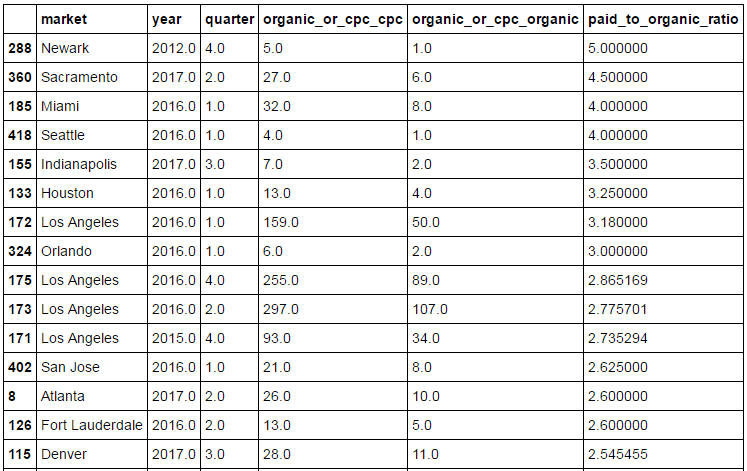

In [2]:
from IPython.display import Image
Image(filename = 'paid_to_organic_ratio.png', width=450, height=350)

We also created two word clouds for 'survey_user_text' and 'cancellation_reason':
The script file is again 'Paid_to_organic_ratio_and_visualization.ipynb'. The input data is "spothero_ds_takehome.csv".

Word Cloud for 'survey_user_text'

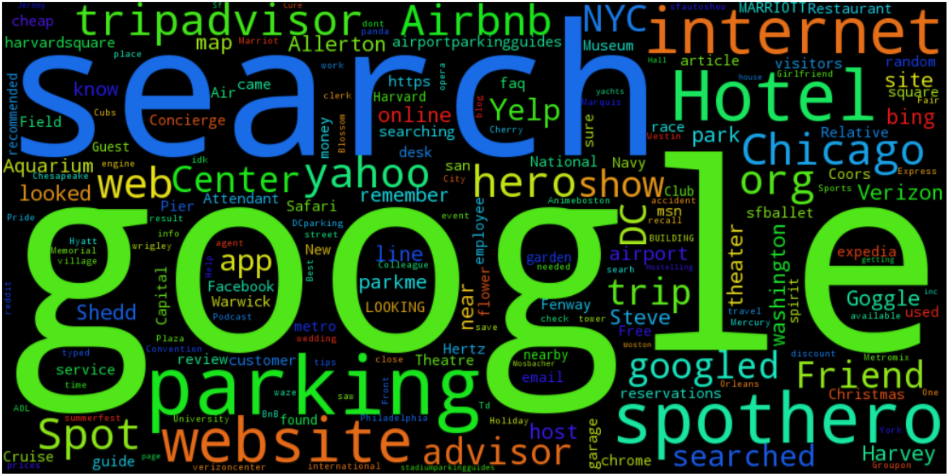

In [11]:
from IPython.display import Image
Image(filename = 'wordcloud_survey_user_text.png', width=800, height=600)

Word Cloud for 'cancellation_reason'

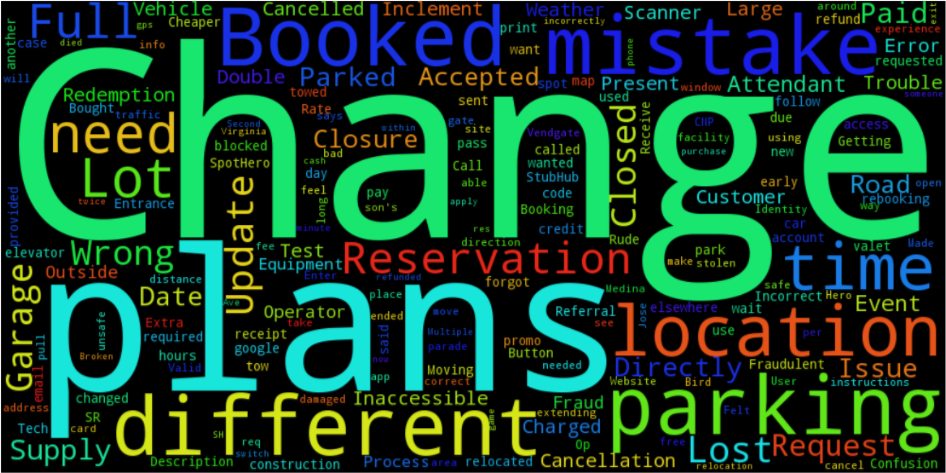

In [12]:
from IPython.display import Image
Image(filename = 'wordcloud_cancellation_reason.png', width=800, height=600)

## Step 3. SpotHero Market Dashboard (Tableau)

We have also created an interactive SpotHero Market Dashboard in Tableau workbook 'SpotHero_EDA' with the following four charts:

Chart1. Sales Volume across Markets with Initiation Channel Breakdown (stacked bar chart)
 - This charts shows the volumn (num. of reservations) distribution across different markets breakdown by initiation channel of paid per click, organic, and other
 - we can see that cities like Chicago, Washington, Boston, Baltimore, Milwaukee, New Orleans have much higher organic search driven sales, while cities like New York, Denver, Los Angelas have higher paid search driven sales

Chart2. First Time Purchase Account Distribution (Chicago\Total Market)
 - this chart is a stack bar chart that has two modes - Chicago\Total Market (switch mode using the mode switcher button)
 - The Chicago mode shows the distribution of first time purchase reservation vs non-first time purchase reservation of Chicago vs the rest of the total market
 - The Chicago mode shows the distribution of first time purchase reservation vs non-first time purchase reservation across different markets including Chicago. 
 - We can see that while more than half of the sales volumn comes from the city of Chicago, Chicago also contributes much bigger share of the sales from existing users than from first-time users. 
 
Chart3. Sales Volume across Markets by First Time Purchase Indicator
 - This charts shows the volumn (num. of reservations) distribution across different markets breakdown by first time purchase and non-first time purchase
 - Again, Chicago is currently the biggest market for SpotHero followed by New York, Washington and Boston. 
 - Chicago also have higher rate of sales from existing customers than other cities do. 
 
Chart4. User Preference across Signup Sources by First Time Purchase Indicator
 - This charts shows the volumn (num. of reservations) distribution across different signup platforms breakdown by first time purchase and non-first time purchase
 - Customers who sign up through webpage are more likely to be first time users of SpotHero compared to customers who sign up through ios and android platform. 


A screenshot of the dashboard is below. For interactive dashboard, please open tableau workbook 'SpotHero_EDA.twb'

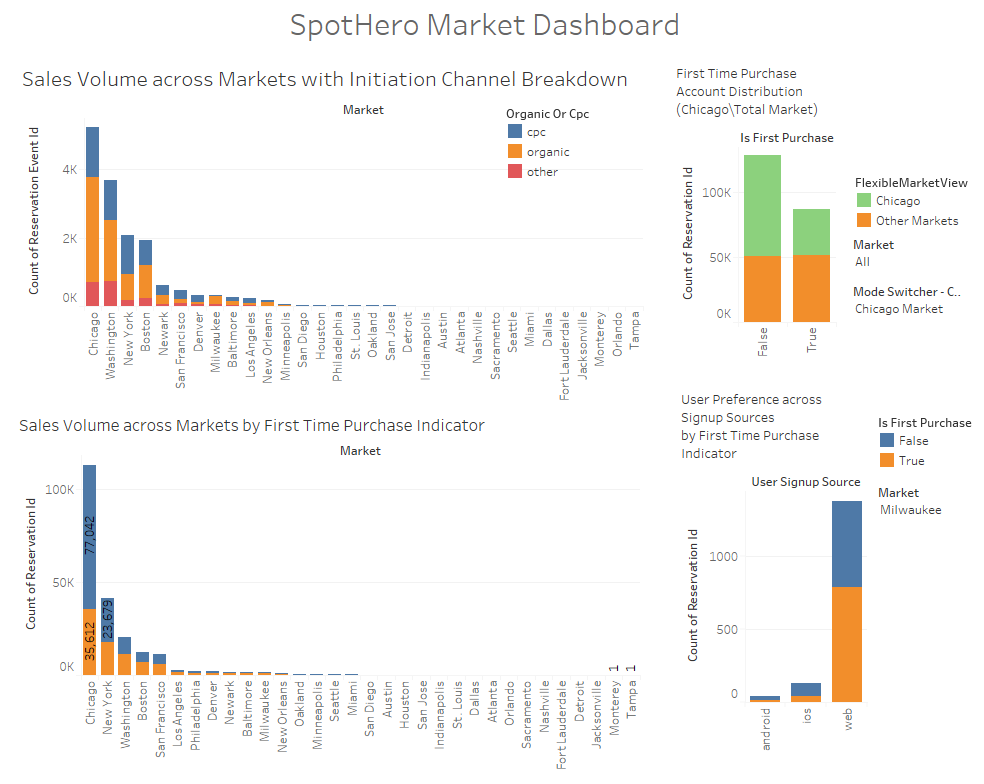

In [10]:
from IPython.display import Image
Image(filename = 'SpotHero_Market_Dashboard.png', width=1000, height=800)